In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading Data

There are many ways to download Iris data <br>
1-     From UCI website <br>
2-     From Kaggle <br>
3-     From scikit-learn <br>
4-     From any github <br>
5-     And Many more <br>

For this project we will follow downloading from UCI website

In [3]:
# downloading data
!wget -O "iris.csv" "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

--2022-02-12 15:34:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-02-12 15:34:41 (96.5 MB/s) - ‘iris.csv’ saved [4551/4551]



In [4]:
# read data into dataframe
data = pd.read_csv('/content/iris.csv', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing

As it is a clustering task we don't need labels columns, So we can split it off

In [5]:
data = data.iloc[:,:-1]
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# lets view data diemensionas
data.shape

(150, 4)

In [7]:
# lets check how much percent data is missing in each column
percent = ((data.isna().sum())/150)*100
percent

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64

## Clustering

In [8]:
# train model on iris dataset and view labels and cluster centers
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(data)
kmeans.labels_
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
#Lets view labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
### counting numbers of elements in clusters
cluster1=np.count_nonzero(kmeans.labels_ == 0)
cluster2=np.count_nonzero(kmeans.labels_ == 1)
cluster3=np.count_nonzero(kmeans.labels_ == 2)
cluster1, cluster2, cluster3

(62, 50, 38)

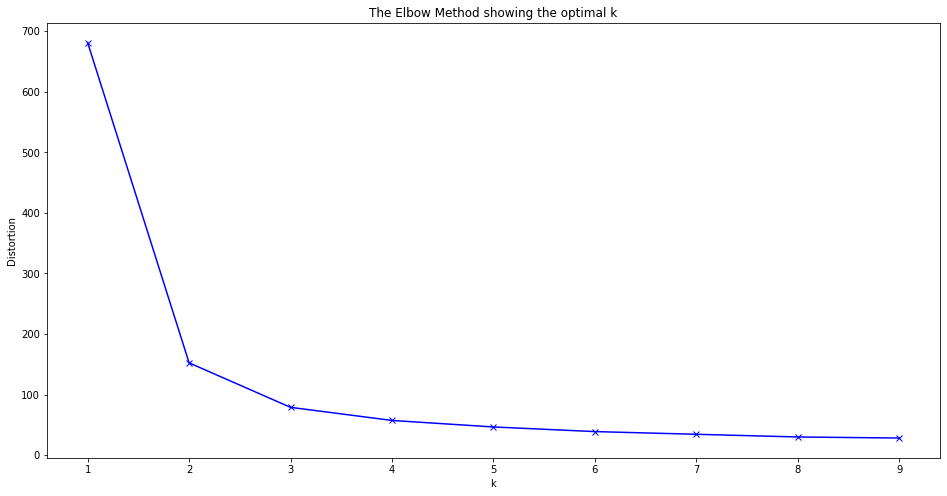

In [11]:
# lets find optimal number of clusters using Elbow method
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit_predict(data)
    distortions.append(kmean.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can see that k=3 is the optimal number of cluster for Iris dataset. So no need to modify the number of clusters

## Visualization

In [14]:
# lets convert dataframe to numpy for plotting
x = data.to_numpy()

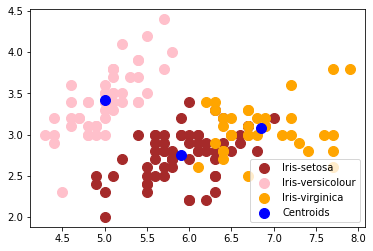

In [19]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()